In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [4]:
!wget 'https://drive.google.com/uc?id=1IhdoUFdSGdk6Hc0KC-lFHDop0X9M7M4t' -O kc_house_data.csv

--2023-10-23 19:21:22--  https://drive.google.com/uc?id=1IhdoUFdSGdk6Hc0KC-lFHDop0X9M7M4t
Resolving drive.google.com (drive.google.com)... 142.251.6.139, 142.251.6.101, 142.251.6.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aphdko2e5rdanhrj6hcsv7avjracb2jv/1698088875000/02611596255248067438/*/1IhdoUFdSGdk6Hc0KC-lFHDop0X9M7M4t?uuid=87722156-86d3-4694-a5d2-a20b9caaa5f8 [following]
--2023-10-23 19:21:23--  https://doc-0c-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aphdko2e5rdanhrj6hcsv7avjracb2jv/1698088875000/02611596255248067438/*/1IhdoUFdSGdk6Hc0KC-lFHDop0X9M7M4t?uuid=87722156-86d3-4694-a5d2-a20b9caaa5f8
Resolving doc-0c-84-docs.googleusercontent.com (doc-0c-84-docs.googleusercontent.com)... 142.250.1.132, 2607:f8b0:4001:c24::84
Connecting to doc-0c-84-d

In [5]:
DATASET_PATH = 'kc_house_data.csv'
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Изучил распределение стоимости недвижимости. Построил графики распределения недвижимости по диапазонам стоимости. Стоимость большинства домов (1/3 от всех) - от 200 000 до 600 000. Остальное распределение видно на графиках.

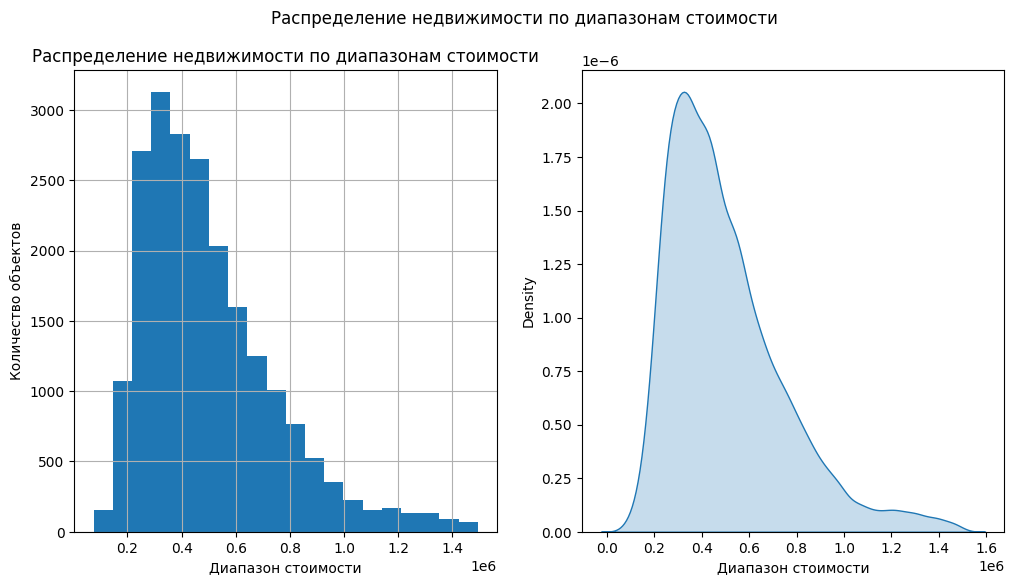

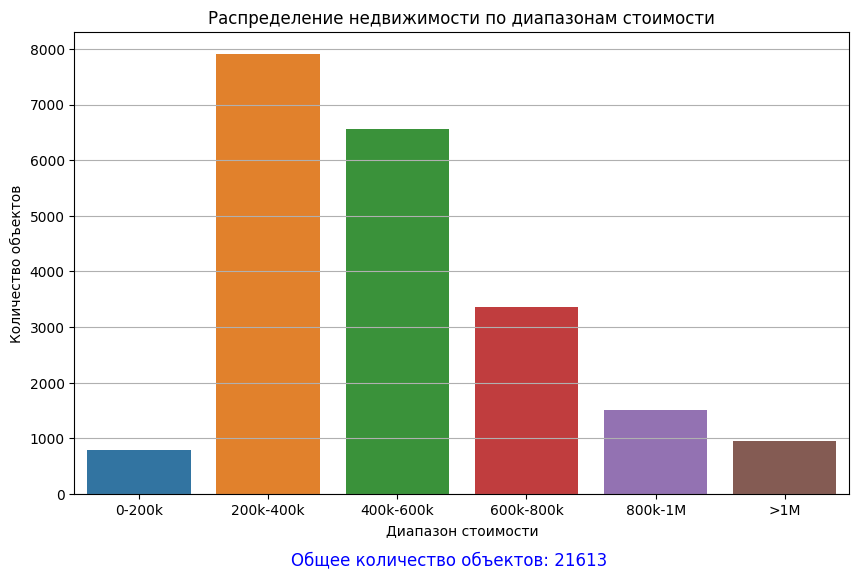

In [39]:
plt.figure(figsize=(12, 6))
df_filtered = df[df['price'] < 1500000]

plt.subplot(121)
df_filtered['price'].hist(density=False, bins=20)
plt.title('Распределение недвижимости по диапазонам стоимости')
plt.xlabel('Диапазон стоимости')
plt.ylabel('Количество объектов')

plt.subplot(122)
sns.kdeplot(df_filtered['price'], shade=True, legend=False)
plt.xlabel('Диапазон стоимости')

plt.suptitle('Распределение недвижимости по диапазонам стоимости')
plt.show()

# Тут попробовал сделать более презентабельный график через countplot
bins = [0, 200000, 400000, 600000, 800000, 1000000, 1500000]
labels = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M', '>1M']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=df, order=labels)
total_objects = len(df)

plt.title('Распределение недвижимости по диапазонам стоимости')
plt.xlabel('Диапазон стоимости')
plt.ylabel('Количество объектов')
plt.grid(axis='y')
plt.figtext(0.5, 0, f'Общее количество объектов: {total_objects}', ha='center', va='center', fontsize=12, color='blue')
plt.show()


Аналогично изучил распределение квадратуры жилой площади.
Более половины всех домов площадью (жилой) в диапазоне от 1000 до 2000 кв м

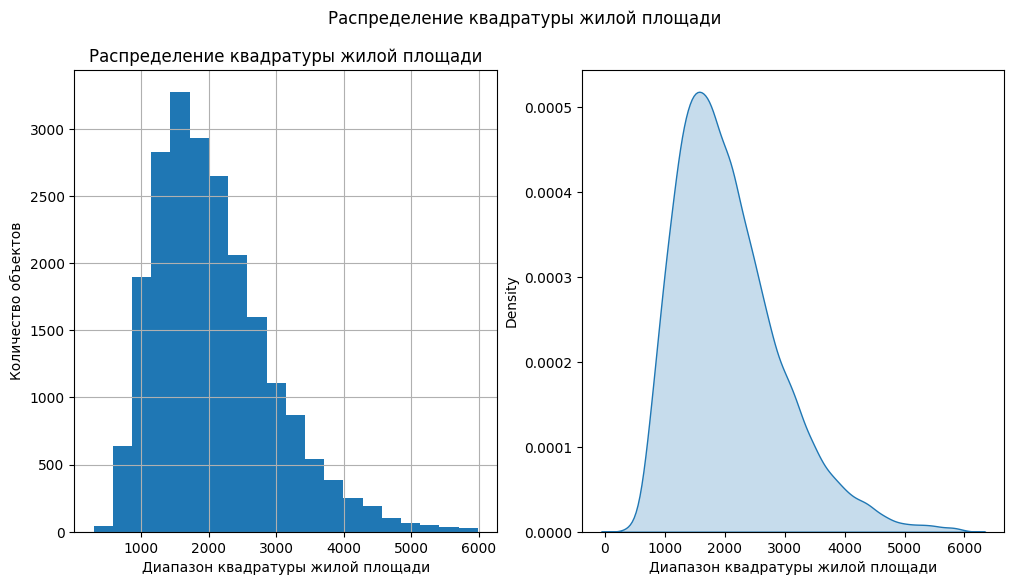

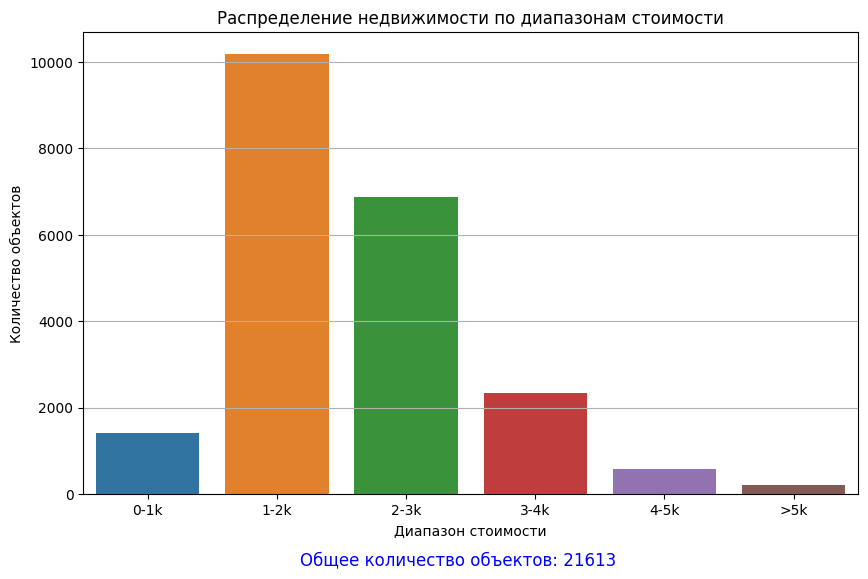

In [47]:
plt.figure(figsize=(12, 6))
df_filtered = df[df['sqft_living'] < 6000]

plt.subplot(121)
df_filtered['sqft_living'].hist(density=False, bins=20)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Диапазон квадратуры жилой площади')
plt.ylabel('Количество объектов')

plt.subplot(122)
sns.kdeplot(df_filtered['sqft_living'], shade=True, legend=False)
plt.xlabel('Диапазон квадратуры жилой площади')

plt.suptitle('Распределение квадратуры жилой площади')
plt.show()

# Тут попробовал сделать более презентабельный график через countplot
bins = [0, 1000, 2000, 3000, 4000, 5000, 1500000]
labels = ['0-1k', '1-2k', '2-3k', '3-4k', '4-5k', '>5k']
df['sqft_living_range'] = pd.cut(df['sqft_living'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='sqft_living_range', data=df, order=labels)
total_objects = len(df)

plt.title('Распределение недвижимости по диапазонам стоимости')
plt.xlabel('Диапазон стоимости')
plt.ylabel('Количество объектов')
plt.grid(axis='y')
plt.figtext(0.5, 0, f'Общее количество объектов: {total_objects}', ha='center', va='center', fontsize=12, color='blue')
plt.show()

Изучил распределение года постройки.
Т.к. годов постройки всего 2, гистограмму не стал строить.
Опять же решил обратиться к countplot, т.к. он более информативен для двух значений.


<Figure size 1200x600 with 0 Axes>

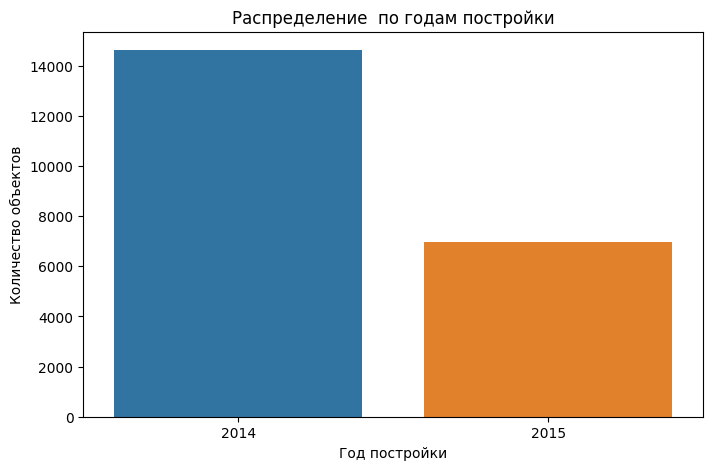

In [61]:
plt.figure(figsize=(12, 6))
df['year'] = df['date'].str[:4]

plt.figure(figsize=(8, 5))
sns.countplot(x='year', data=df)
plt.title('Распределение  по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество объектов')
plt.show()



Изучил распределение домов от наличия вида на набережную.
Попробовал сделать распределение на карте домов с видом на набережную.
Мы такого не проходили на лекции, но дополнительно захотел добавить на карту отображение coolwarm для каждого объекта (реализацию price_to_color нашел в интернете).
Хотел построить график показывающий сколько домов с видом на набережную в процентоном соотношении от общего, но их оказалось меньше 1%.



In [74]:
import folium
this_map = folium.Map(prefer_canvas=True)
df_filtered = df[df['waterfront'] == 1]

def price_to_color(val, min_val, max_val):
    norm = plt.Normalize(min_val, max_val)
    cmap = plt.get_cmap("coolwarm")
    return plt.cm.colors.to_hex(cmap(norm(val)))

def plotDot(point):
    color = price_to_color(point.price, df_filtered['price'].min(), df_filtered['price'].max())
    folium.CircleMarker(
        location=[point.lat, point.long],
        radius=2,
        weight=5,
        color=color,
        fill=True,
        fillColor=color,
        popup=str(point.price)
    ).add_to(this_map)


df_filtered.iloc[:50].apply(plotDot, axis=1) # iloc[:50] поставил просто для удобства (долго прогружается)
this_map.fit_bounds(this_map.get_bounds())
this_map

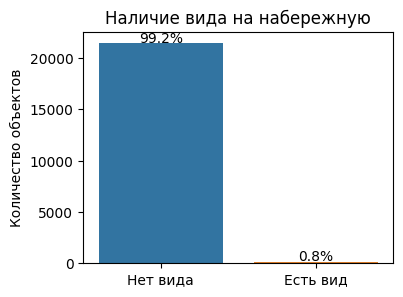

In [91]:
waterfront_counts = df['waterfront'].value_counts()

total = len(df)
percent_no_view = (waterfront_counts[0] / total) * 100
percent_with_view = (waterfront_counts[1] / total) * 100

plt.figure(figsize=(4, 3))
ax = sns.countplot(data=df, x='waterfront')
plt.title('Наличие вида на набережную')
plt.xlabel('')
plt.ylabel('Количество объектов')
plt.xticks(ticks=[0,1], labels=['Нет вида', 'Есть вид'])

ax.text(0, waterfront_counts[0] + 50, f'{percent_no_view:.1f}%', ha='center')
ax.text(1, waterfront_counts[1] + 50, f'{percent_with_view:.1f}%', ha='center')

plt.show()


Изучил распределение этажей домов.
Практически у всех 1-2 этажа.
Не понял почему в БД у части домов этажность - не целое число, из-за этого округлил значения до целых.

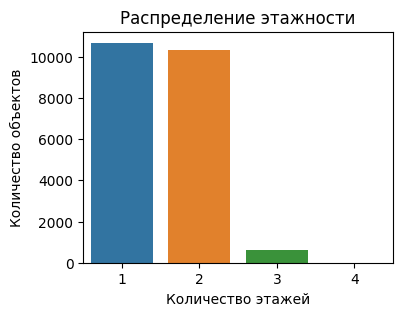

In [96]:
plt.figure(figsize=(4, 3))
df['rounded_floors'] = df['floors'].apply(lambda x: round(x))
ax = sns.countplot(data=df, x='rounded_floors')
plt.title('Распределение этажности')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объектов')

plt.show()

Изучил распределение состояния домов.
В основном состояние среднее.

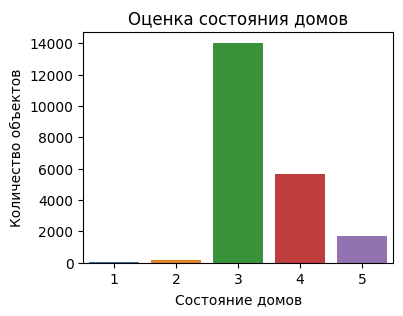

In [100]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=df, x='condition')
plt.title('Оценка состояния домов')
plt.xlabel('Состояние домов')
plt.ylabel('Количество объектов')
plt.show()

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Исследовал, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

1) Решил начать с матрицы коррекляций. Т.к. нас по ТЗ интересует только корреляция с ценой - отфильтровал по цене.

Больше всего зависимость видна по всем параметрам относящимся к площади (кроме подвала).
Практически такая же зависимость от грейда здания.

Интересно, что вид на набережную никак (стоит ограничение индекса корреляции не меньше 0.3) не коррелирует с ценой. А просто признак "видовой квартиры" влияет.


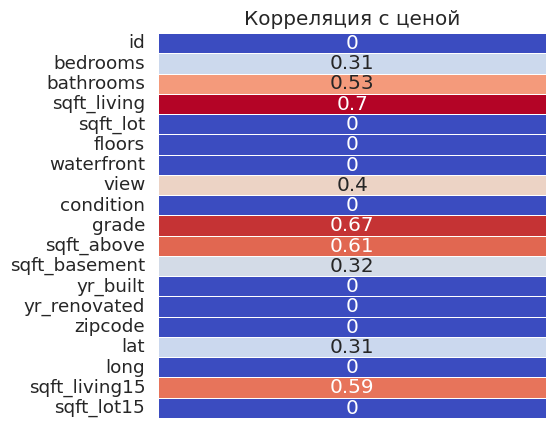

In [17]:
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)

# Выбор столбца 'price' из корреляционной матрицы
corr_matrix = df.corr()
price_corr = corr_matrix['price']
price_corr[np.abs(price_corr) < 0.3] = 0
# Отфильтровываем 'price', чтобы не показывать его корреляцию с самим собой
price_corr = price_corr.drop('price', axis=0)

# Создание графика
sns.heatmap(price_corr[:, np.newaxis], annot=True, linewidths=.5, cmap='coolwarm', cbar=False, yticklabels=price_corr.index, xticklabels='' )
plt.title('Корреляция с ценой')
plt.show()

Построим граик зависимости цены от жилой площади.
По углу наклона линии на графике, убеждаемся, что зависимость есть (прямая линейная).

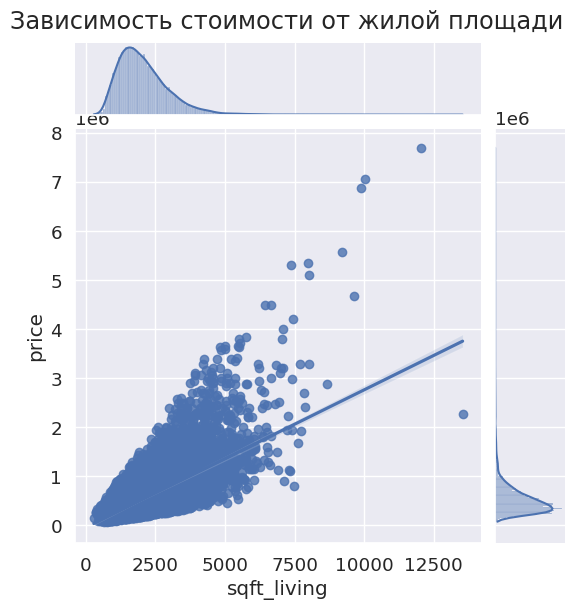

Индекс корреляции: 0.70


In [19]:
filtered_data = df.dropna(subset=['sqft_living', 'price'])

sns.jointplot(x=filtered_data['sqft_living'], y=filtered_data['price'], kind='reg') # у Вас на лекции явно не указываются оси (x=...,y=...) у меня, если я не указываю, почему-то ошибка
plt.suptitle('Зависимость стоимости от жилой площади', y=1.02)
correlation_living = filtered_data['sqft_living'].corr(filtered_data['price'])
plt.show()
print(f"Индекс корреляции: {correlation_living:.2f}")

Заметил, что стоимость не коррелирует с состоянием (condition) объекта.

Хочу убедиться на графике.

Линейной зависимости нет.

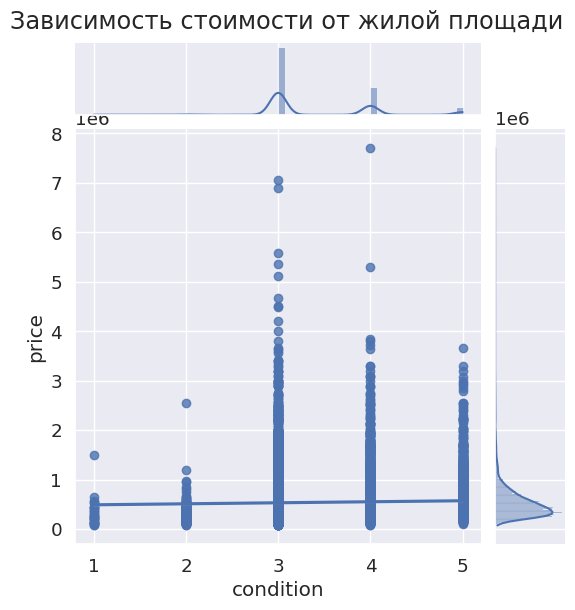

Индекс корреляции: 0.04


In [20]:
filtered_data = df.dropna(subset=['condition', 'price'])

sns.jointplot(x=filtered_data['condition'], y=filtered_data['price'], kind='reg') # у Вас на лекции явно не указываются оси (x=...,y=...) у меня, если я не указываю, почему-то ошибка
plt.suptitle('Зависимость стоимости от жилой площади', y=1.02)
correlation_living = filtered_data['condition'].corr(filtered_data['price'])
plt.show()
print(f"Индекс корреляции: {correlation_living:.2f}")

Посмотрим среднюю стоимость по грейдам.

Ожидаемо, что чем выше грейд - тем выше стоимость.

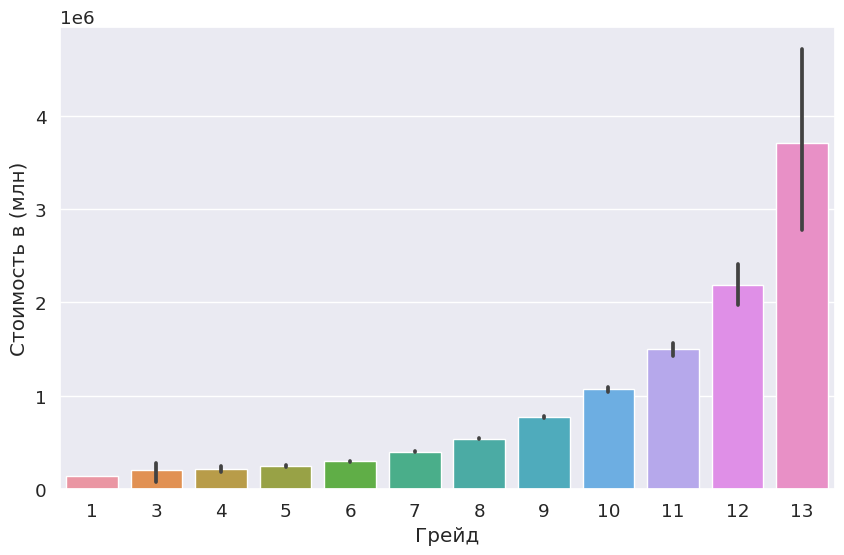

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['grade'], y=df['price'])
plt.xlabel('Грейд')
plt.ylabel('Стоимость в (млн)')
plt.show()


Все же решил проанаизировать зависимость цены от состояния недвижимости, т.к. логично, что она должна быть.

Средняя цена недвижимости увеличивается по мере улучшения состояния недвижимости.
Есть заметный скачок в средних ценах между состоянием 2 и 3.

В данном случае, хоть и коэффициент корреляции маленький, график ясно показывает, что существует некоторая зависимость между состоянием недвижимости и ее ценой.

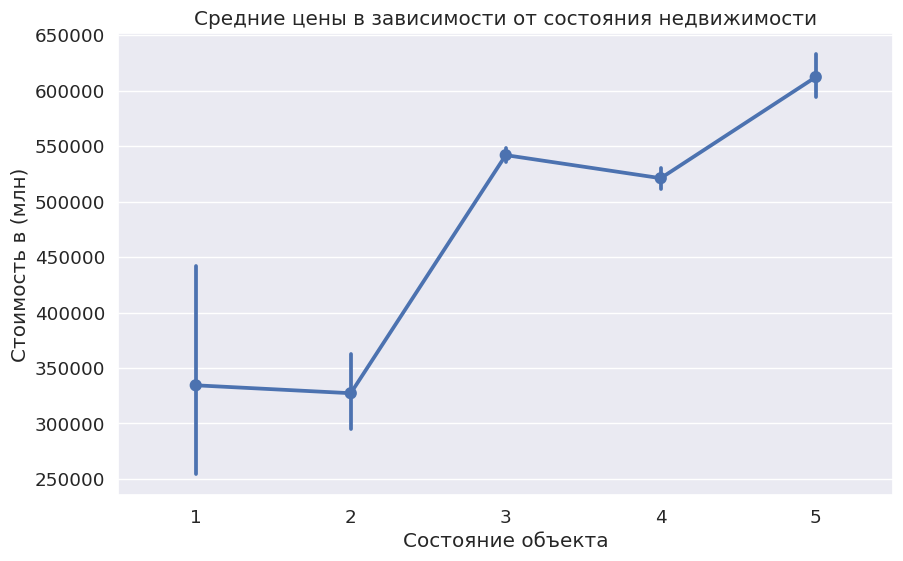

In [36]:
plt.figure(figsize=(10, 6))
sns.pointplot(x=df['condition'], y=df['price'])
plt.title('Средние цены в зависимости от состояния недвижимости')
plt.xlabel('Состояние объекта')
plt.ylabel('Стоимость в (млн)')
plt.show()